In [1]:
## DL Assignment No. 05
#5. Implement the Continuous Bag of Words (CBOW) Model. Stages can be:
#a. Data preparation
#b. Generate training data
#c. Train model
#d. Output
#https://www.kaggle.com/code/aggarwalrahul/nlp-word-embedding-continuous-bag-of-words-cbow


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
%matplotlib inline

In [3]:
import re
sentences = """ The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. 
Further, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission –transmission of the virus before the appearance of symptoms – is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. 
The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult.  """

In [4]:
# a. Data preparation
# remove special characters from text
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
#sentences

In [5]:
# remove 1 letter words like 'a'
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
#sentences

In [6]:
# make all words lower case
sentences = sentences.lower()
#sentences

In [7]:
# Creating the vocabulary
words = sentences.split()
vocab = set(words)
vocab_size = len(vocab)
#vocab

In [8]:
# Indexing the Words
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [9]:

data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['the', 'speed', 'transmission', 'is'], 'of'), (['speed', 'of', 'is', 'an'], 'transmission'), (['of', 'transmission', 'an', 'important'], 'is'), (['transmission', 'is', 'important', 'point'], 'an'), (['is', 'an', 'point', 'of'], 'important')]


In [10]:
embeddings = np.random.random_sample((vocab_size, 10))

In [11]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [13]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)
def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- out + softmax) / logits.shape[0]
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o
def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw
def optimize(theta, grad, lr=0.03): 
    theta -= grad * lr
    return theta

In [14]:
# c. Train model
theta = np.random.uniform(-1, 1, (2 * 2 * 10, vocab_size))
epoch_losses = {}
for epoch in range(80):
    losses = []
    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)
        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
    epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

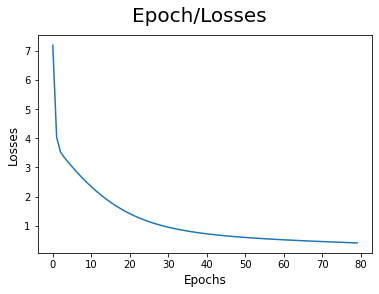

In [15]:
ix = np.arange(0,80)
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [16]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    return word
# (['we', 'are', 'to', 'study'], 'about')
#predict(['we', 'are', 'about', 'study'])

In [17]:
def accuracy():
    wrong = 0
    for context, target in data:
        if(predict(context) != target):
            wrong += 1
    return (1 - (wrong / len(data)))
accuracy()

0.9835164835164835

In [18]:
# d. Output
predict(['transmission', 'is', 'important', 'point'])

'an'